In [1]:
import math
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
import matplotlib.pyplot as plt


def new_centroid(cluster):
    new_x, new_y = 0, 0
    for point in cluster:
        new_x += point[0]
        new_y += point[1]
    new_x /= len(cluster)
    new_y /= len(cluster)
    return (new_x, new_y)


def k_3_means(points, centroids):
    new_centroids = []
    cluster_1 = []
    cluster_2 = []
    cluster_3 = []
    for point in points:
        d1 = distance(centroids[0], point)
        d2 = distance(centroids[1], point)
        d3 = distance(centroids[2], point)
        minimum = min(d1, d2, d3)
        if minimum == d1:
            cluster_1.append(point)
        elif minimum == d2:
            cluster_2.append(point)
        elif minimum == d3:
            cluster_3.append(point)

    new_centroids.append(new_centroid(cluster_1))
    new_centroids.append(new_centroid(cluster_2))
    new_centroids.append(new_centroid(cluster_3))
    for i in range(3):
        print(distance(centroids[i], new_centroids[i]))

    return new_centroids, [cluster_1, cluster_2, cluster_3]


def distance(a, b):
    return math.sqrt((a[0] - b[0]) ** 2 + (a[1] - b[1])**2)


def distance_matrix(points):
    matrix = []
    n = len(points)
    for i in range(n):
        matrix.append([])
        for j in range(n):
            matrix[i].append(distance(points[i], points[j]))
    return matrix


def RBF_kernel(gamma, x, y):
    value = distance(x, y)**2
    return math.exp(-gamma*value)


def RBF_matrix(gamma, points):
    matrix = []
    n = len(points)
    for i in range(n):
        matrix.append([])
        for j in range(n):
            matrix[i].append(RBF_kernel(gamma, points[i], points[j]))
    return matrix


def sim_matrix(points, closest_3):
    matrix = []
    n = len(points)
    for i in range(n):
        matrix.append([])
        for j in range(n):
            sim = 0
            if (points[j] in closest_3[points[i]]):
                sim = 1
            matrix[i].append(sim)
    return matrix


def centroids_question():
    points = [(2, 10), (2, 5), (8, 4), (5, 8), (7, 5), (6, 4), (1, 2), (4, 9)]
    matrix = distance_matrix(points)
    centroids = [(2, 10), (5, 8), (1, 2)]
    clusters = []
    for i in range(10):
        print(f"{i+1} EPOCH")
        centroids, clusters = k_3_means(points, centroids)
        print()
    print()


def normalized_cut(points, k, gamma):
    delta_matrix = np.array(distance_matrix(points))
    A_matrix = np.array(RBF_matrix(gamma, points))
    L_matrix = delta_matrix-A_matrix
    L_a_matrix = np.linalg.inv(delta_matrix)*L_matrix
    B = L_a_matrix
    lamdas, U = np.linalg.eigh(B)
    index_array = np.argsort(lamdas, axis=0)
    eigenvalues = lamdas[index_array]
    eigenvectors = U[:, index_array]
    Y = normalize(eigenvectors)
    projected_points = np.dot(Y,points)
    kmeans = KMeans(n_clusters=k).fit(projected_points)
    plt.scatter(projected_points[:, 0],
                projected_points[:, 1], c=kmeans.labels_)
    plt.show()


def sim_normalized_cut(points, k):
    closest_3 = {}
    for point1 in points:
        closest_3[point1] = [(100, 100), (100, 100), (100, 100)]
        for point2 in points:
            d = distance(point1, point2)
            if (d <= distance(point1, closest_3[point1][0])):
                closest_3[point1][0] = point2
            elif d <= distance(point1, closest_3[point1][1]):
                closest_3[point1][1] = point2
            elif d <= distance(point1, closest_3[point1][2]):
                closest_3[point1][2] = point2
    delta_matrix = np.array(distance_matrix(points))
    A_matrix = sim_matrix(points, closest_3)
    L_matrix = delta_matrix-A_matrix
    L_a_matrix = np.linalg.inv(delta_matrix)*L_matrix
    B = L_a_matrix
    lamdas, U = np.linalg.eigh(B)
    index_array = np.argsort(lamdas, axis=0)
    eigenvalues = lamdas[index_array]
    eigenvectors = U[:, index_array]
    Y = normalize(eigenvectors)
    points = np.array(points)
    projected_points = np.dot(Y, points)
    kmeans = KMeans(n_clusters=k).fit(projected_points)
    plt.scatter(projected_points[:, 0],
                projected_points[:, 1], c=kmeans.labels_)
    plt.show()

In [2]:
def question_3():
    a = (5, 8)
    b = (10, 8)
    c = (11, 8)
    d = (6, 7)
    e = (10, 7)
    f = (12, 7)
    g = (13, 7)
    h = (5, 6)
    i = (10, 6)
    j = (13, 6)
    n = (14, 6)
    k = (6, 5)
    m = (11, 5)
    o = (15, 5)
    p = (2, 4)
    q = (3, 4)
    r = (5, 4)
    s = (6, 4)
    t = (7, 4)
    l = (9, 4)
    u = (15, 4)
    v = (3, 3)
    w = (7, 3)
    x = (9, 2)

    points = [a, b, c, d, e, f, g, h, i, j, k, l,
              m, n, o, p, q, r, s, t, u, v, w, x]

    gammas = [0.01, 0.1, 1, 10]
    # a)
    for gamma in gammas:
        normalized_cut(np.array(points), 3, gamma)
    # b)
    print("##############################")
    sim_normalized_cut(points, 3)


def question_4():
    a = (5, 8)
    b = (10, 8)
    c = (11, 8)
    d = (6, 7)
    e = (10, 7)
    f = (12, 7)
    g = (13, 7)
    h = (5, 6)
    i = (10, 6)
    j = (13, 6)
    n = (14, 6)
    k = (6, 5)
    m = (11, 5)
    o = (15, 5)
    p = (2, 4)
    q = (3, 4)
    r = (5, 4)
    s = (6, 4)
    t = (7, 4)
    l = (9, 4)
    u = (15, 4)
    v = (3, 3)
    w = (7, 3)
    x = (9, 2)

    original_points = [a, b, c, d, e, f, g, h, i, j, k, l,
                       m, n, o, p, q, r, s, t, u, v, w, x]

    points = np.array(original_points)

    K = [2, 3, 4]
    for k in K:
        print(f"K={k}",end="\n################")
        kmeans = KMeans(n_clusters=k).fit(points)
        plt.scatter(points[:, 0],
                    points[:, 1], c=kmeans.labels_)
        plt.show()
        sim_normalized_cut(original_points, k)


/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


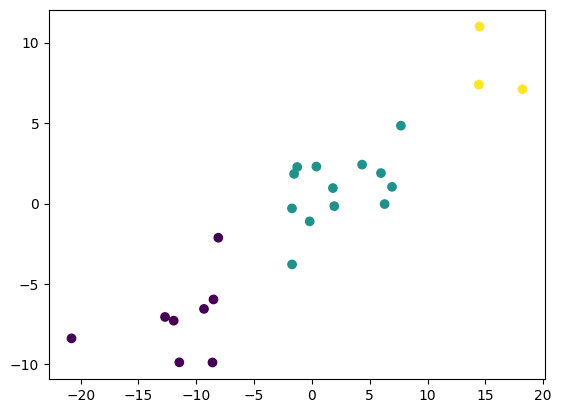

/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


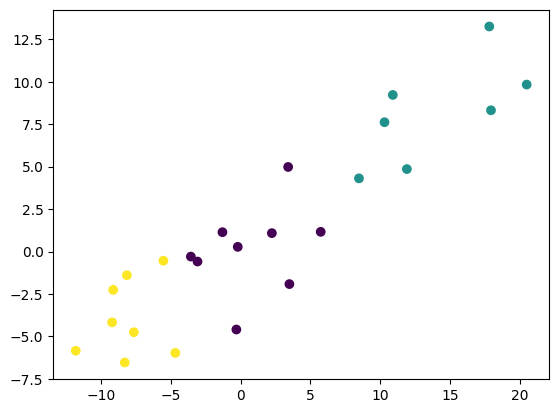

/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


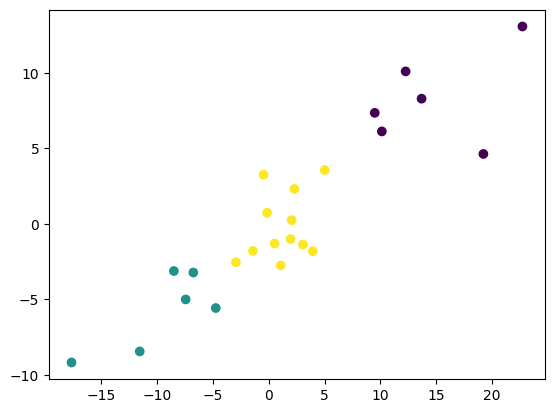

/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


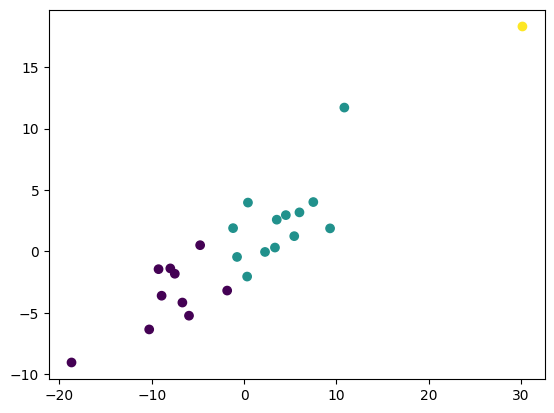

/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


##############################


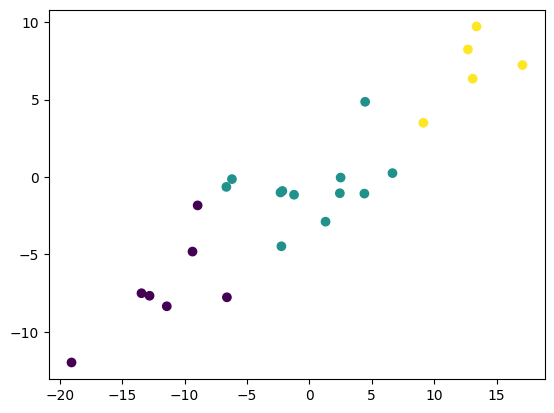

In [3]:
question_3()

K=2
################

/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


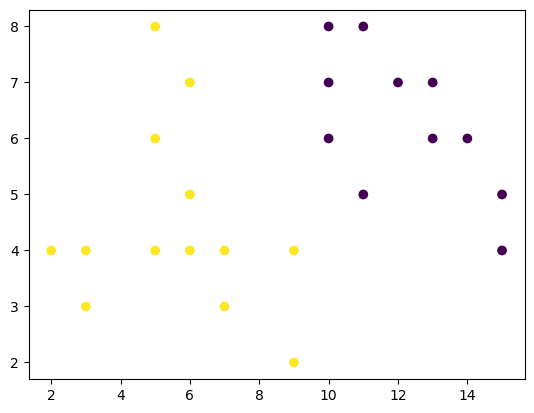

/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


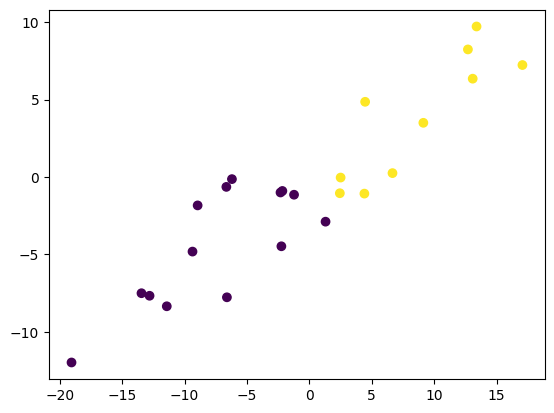

K=3
################

/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


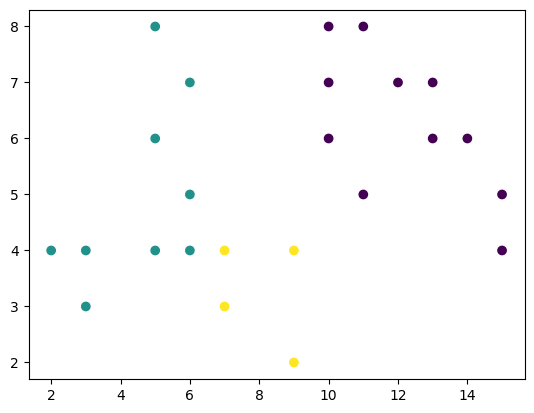

/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


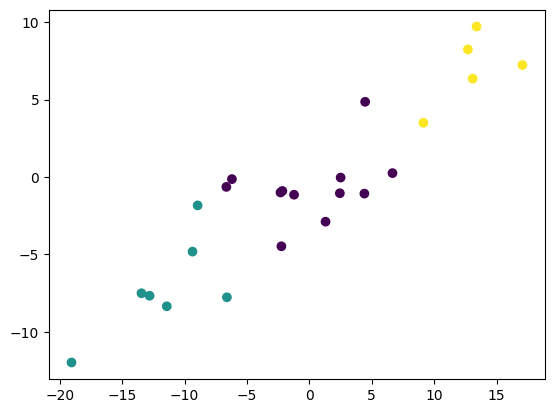

K=4
################

/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


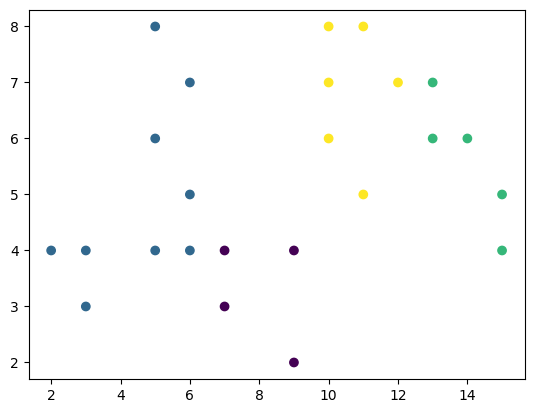

/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


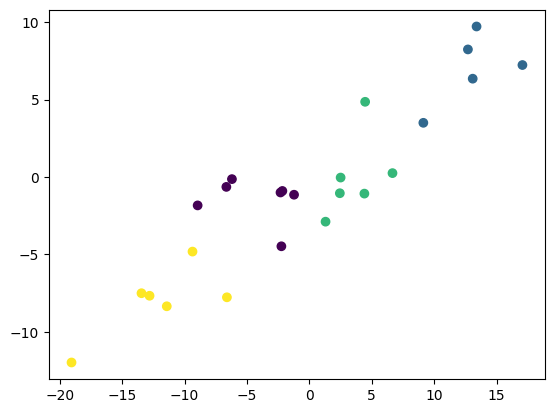

In [4]:
question_4()